In [ ]:
#For extracting The Amazon Review for a product.
from selectorlib import Extractor
import requests 
import json 
from time import sleep
import csv
from dateutil import parser as dateparser

# Create an Extractor by reading from the YAML file
e = Extractor.from_yaml_file('selectors.yml')

def scrape(url):    
    headers = {
        'authority': 'www.amazon.com',
        'pragma': 'no-cache',
        'cache-control': 'no-cache',
        'dnt': '1',
        'upgrade-insecure-requests': '1',
        'user-agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
        'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
        'sec-fetch-site': 'none',
        'sec-fetch-mode': 'navigate',
        'sec-fetch-dest': 'document',
        'accept-language': 'en-GB,en-US;q=0.9,en;q=0.8',
    }

    # Download the page using requests
    print("Downloading %s"%url)
    r = requests.get(url, headers=headers)
    # Simple check to check if page was blocked (Usually 503)
    if r.status_code > 500:
        if "To discuss automated access to Amazon data please contact" in r.text:
            print("Page %s was blocked by Amazon. Please try using better proxies\n"%url)
        else:
            print("Page %s must have been blocked by Amazon as the status code was %d"%(url,r.status_code))
        return None
    # Pass the HTML of the page and create 
    return e.extract(r.text)

# product_data = []
with open("urls.txt",'r') as urllist, open('data.csv','w') as outfile:
    writer = csv.DictWriter(outfile, fieldnames=["title","content","date","variant","images","verified","author","rating","product","url"],quoting=csv.QUOTE_ALL)
    writer.writeheader()
    for url in urllist.readlines():
        data = scrape(url) 
        if data:
            for r in data['reviews']:
                r["product"] = data["product_title"]
                r['url'] = url
                if 'verified' in r:
                    if 'Verified Purchase' in r['verified']:
                        r['verified'] = 'Yes'
                    else:
                        r['verified'] = 'Yes'
                r['rating'] = r['rating'].split(' out of')[0]
                date_posted = r['date'].split('on ')[-1]
                if r['images']:
                    r['images'] = "\n".join(r['images'])
                r['date'] = dateparser.parse(date_posted).strftime('%d %b %Y')
                writer.writerow(r)
            # sleep(5)
    


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models
import nltk
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
#from wordcloud import WordCloud
%matplotlib inline

In [2]:
!python -m spacy download en_core_web_md

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [3]:
import pandas
review=pd.read_csv("data.csv",error_bad_lines=False,encoding='cp1252')

In [4]:
review.head()

,title,content,date,variant,images,verified,author,rating,product,url
0,Replacing my Wacom Cintiq. An artists dream,It is everything I had hoped it would be and m...,10 Apr 2020,Style: Wi-Fi Size: 128GB Color: Space Gray,NaN,Yes,Elizabeth Darling,5.0,"New Apple iPad Pro (12.9-inch, Wi-Fi, 512GB) -...",https://www.amazon.com/Apple-iPad-12-9-inch-Wi...
1,Good Tablet but the picture quality is lagging...,The list of updates to this device over the 20...,02 Apr 2020,Style: Wi-Fi Size: 128GB Color: Space Gray,NaN,Yes,Amazon Customer,3.0,"New Apple iPad Pro (12.9-inch, Wi-Fi, 512GB) -...",https://www.amazon.com/Apple-iPad-12-9-inch-Wi...
2,Not overpriced !!!!,This iPad is amazing for school Also for other...,04 Apr 2020,Style: Wi-Fi Size: 256GB Color: Space Gray,NaN,Yes,jaiquan frazier,5.0,"New Apple iPad Pro (12.9-inch, Wi-Fi, 512GB) -...",https://www.amazon.com/Apple-iPad-12-9-inch-Wi...
3,"What can I say? It's an Apple iPad Pro, Love It.","I have a Microsoft Surface ProX, it's good, bu...",04 Apr 2020,Style: Wi-Fi + Cellular Size: 512GB Color: Silver,NaN,Yes,Mouse9mm,5.0,"New Apple iPad Pro (12.9-inch, Wi-Fi, 512GB) -...",https://www.amazon.com/Apple-iPad-12-9-inch-Wi...
4,Love!,I really love it!,30 Mar 2020,Style: Wi-Fi + Cellular Size: 256GB Color: Silver,NaN,Yes,Stephanie P,5.0,"New Apple iPad Pro (12.9-inch, Wi-Fi, 512GB) -...",https://www.amazon.com/Apple-iPad-12-9-inch-Wi...


In [5]:
review1=review.iloc[:,1]

In [6]:
review1.head()

0    It is everything I had hoped it would be and m...
1    The list of updates to this device over the 20...
2    This iPad is amazing for school Also for other...
3    I have a Microsoft Surface ProX, it's good, bu...
4                                    I really love it!
Name: content, dtype: object

In [8]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(review1))
sentences[5:15]

['No lag running adobe photoshop or procreate.',
 '128gb was more than enough space for me to have all my art programs, teaching apps, as well as some extras.',
 'This has taken my art and enjoyment of the process to the next level.',
 'No more being stuck on a computer.',
 'I can create high level art from the comfort of my bed or take it on the road!',
 "The list of updates to this device over the 2018 iPad Pro is so minimal that they're basically the same device.",
 'Unless you desperately need LiDAR on your tablet, stick with the 2018 model if you already have it.',
 "Probably the best overall tablet around but I'm disappointed that there's no HDR10 or OLED, or mini/micro-LED screen upgrade.",
 'The Galaxy Tab S6 has better picture quality compared to this.',
 'The iPad has a 120hz refresh rate though, which helps for smoother writing with the Apple Pencil, which I enjoy using.']

In [9]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,It is everything I had hoped it would be and m...
1,I am an artist and use this primarily for draw...
2,I am using this with the Apple Pencil 2nd gen ...
3,Of all my digital drawing tools this is my fav...
4,"Gorgeous high resolution display, wonderful pe..."
...,...
277,12.9 and fast processor and 1tb that I got!
278,So many raw files and way better than a desktop!
279,And it is fun to edit now my photos!
280,Can travel and pick with you!


In [11]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [13]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [14]:
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [15]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [16]:
# test that it works
calculate_sentiment(text = 'amazing')

4

In [17]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [18]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    11
1    10
2    26
3    10
4    18
5     7
6    21
7    14
8     7
9    18
Name: word_count, dtype: int64

In [19]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
250,This iPad is amazing for school Also for other...,6,47
122,Amazing speedy and responsive tablet as expect...,6,12
135,Amazing device.. as a photographer I truly rec...,6,10
156,This iPad is amazing for school Also for other...,6,47
169,Amazing speedy and responsive tablet as expect...,6,12
182,Amazing device.. as a photographer I truly rec...,6,10
203,This iPad is amazing for school Also for other...,6,47
229,Amazing device.. as a photographer I truly rec...,6,10
62,This iPad is amazing for school Also for other...,6,47
109,This iPad is amazing for school Also for other...,6,47


In [21]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    282.000000
mean       0.893617
std        2.664388
min       -5.000000
25%        0.000000
50%        0.000000
75%        3.000000
max        6.000000
Name: sentiment_value, dtype: float64

In [22]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
1,I am an artist and use this primarily for draw...,0,10
2,I am using this with the Apple Pencil 2nd gen ...,0,26
5,No lag running adobe photoshop or procreate.,-2,7
6,128gb was more than enough space for me to hav...,0,21
7,This has taken my art and enjoyment of the pro...,0,14


In [24]:
sent_df[sent_df['sentiment_value']>=6].head()

,sentence,sentiment_value,word_count
15,This iPad is amazing for school Also for other...,6,47
28,Amazing speedy and responsive tablet as expect...,6,12
41,Amazing device.. as a photographer I truly rec...,6,10
62,This iPad is amazing for school Also for other...,6,47
75,Amazing speedy and responsive tablet as expect...,6,12


In [25]:
sent_df['index']=range(0,len(sent_df))

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

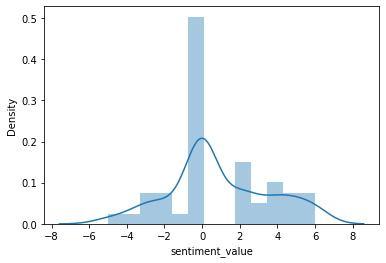

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

In [ ]:
Insight: The sentiment value is almost scattered evenly. 

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

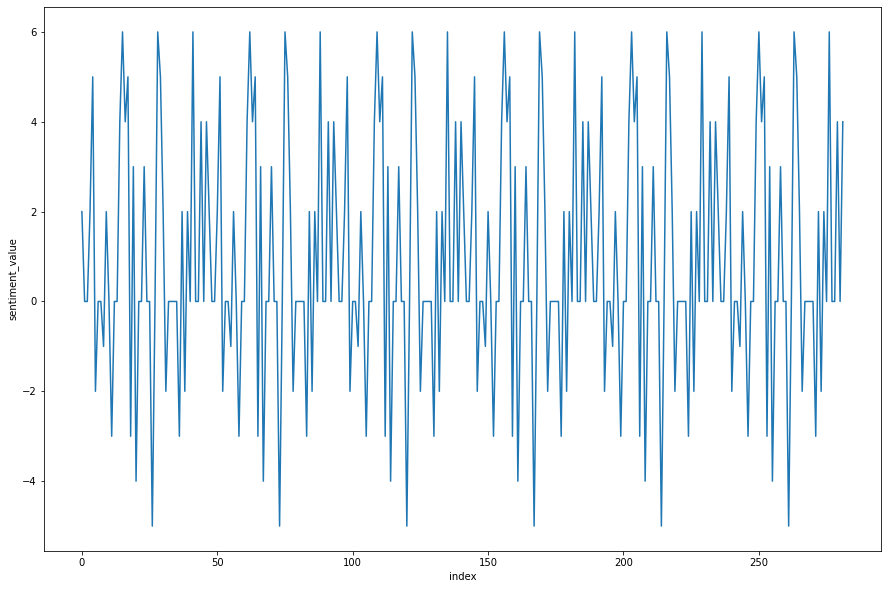

In [27]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

Insight: There are almost equal no of of positive and negative sentiment.
         As we can see the max sentiment value is 6 and min is -5

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

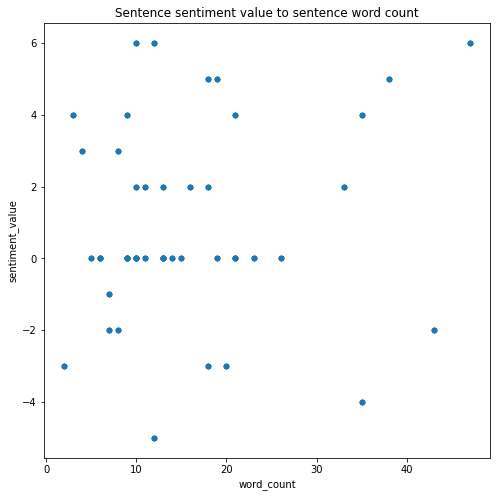

In [28]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')